# 1.Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# 2.Loading and exploration of Dataset

In [15]:
df=pd.read_csv("loan_data_1.csv")
df.head(100)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
5,5,LP001024,Male,Yes,2,Graduate,No,3200.0,700.0,70.0,360.0,1.0,Urban,Y
6,6,LP001027,Male,Yes,2,Graduate,NaN,2500.0,1840.0,109.0,360.0,1.0,Urban,Y
7,7,LP001029,Male,No,0,Graduate,No,1853.0,2840.0,114.0,360.0,1.0,Rural,N
8,8,LP001030,Male,Yes,2,Graduate,No,1299.0,1086.0,17.0,120.0,1.0,Urban,Y
9,9,LP001032,Male,No,0,Graduate,No,4950.0,0.0,125.0,360.0,1.0,Urban,Y


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             376 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         373 non-null    object 
 5   Education          375 non-null    object 
 6   Self_Employed      360 non-null    object 
 7   ApplicantIncome    369 non-null    float64
 8   CoapplicantIncome  363 non-null    float64
 9   LoanAmount         373 non-null    float64
 10  Loan_Amount_Term   370 non-null    float64
 11  Credit_History     351 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 41.8+ KB


In [19]:
df.isnull().sum()


Unnamed: 0            0
Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

# 3.Summary Statistics of dataset

In [21]:
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,190.000000,3555.944882,1246.359370,105.020997,341.417323,0.850394
std,110.129469,1405.266573,2332.651295,28.192843,67.625957,0.357154
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4188.000000,1964.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [22]:
df.describe(exclude=[np.number])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,381,381,381,381,381,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,296,228,242,280,346,149,271


# 4.Handling Missing data

In [20]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)
print(df.isnull().sum())

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# 5.Outlier Detection

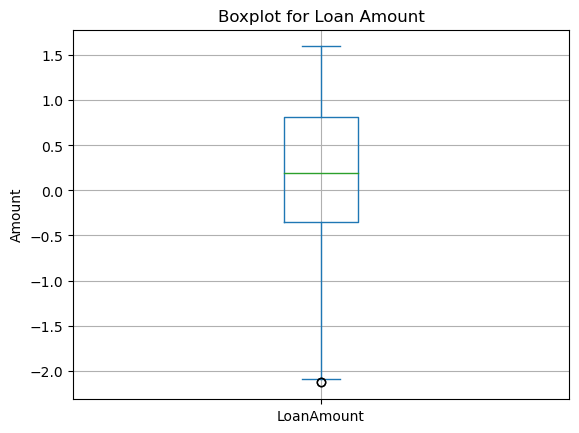

In [30]:
df['LoanAmount'].plot(kind='box', title='Boxplot for Loan Amount')
plt.ylabel("Amount")
plt.grid(True)
plt.show()

# 6.Encode categorical features

In [37]:
cat_cols = df.select_dtypes(include=['object']).columns

In [38]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [39]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 7.Save Cleaned Data

In [41]:
df.to_csv("LoanDatasetCleaned.csv", index=False)